In [66]:
#importing of libraries
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose #library for time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
statsmodels.__version__

'0.12.0'

In [67]:
#reading the dataset file
df = pd.read_csv("dataset_2017_2020.csv")

In [68]:
#deleting duplicates
df.drop_duplicates(keep= 'first', inplace=True)
df

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,36987,860776,80984,Promiscuous,2 adults with kids,45-54,Produce,national,Vegetables - all others,374,2018-07-19 00:00:00,0.79,0
77746,36987,1060673,80984,Promiscuous,2 adults with kids,45-54,Meat,national,Lunch meat,374,2018-07-19 00:00:00,3.00,0
77747,36987,973374,80984,Promiscuous,2 adults with kids,45-54,Produce,private,Onions,374,2018-07-19 00:00:00,1.99,0
77748,36987,13506200,80984,Promiscuous,2 adults with kids,45-54,Meat,national,Beef,374,2018-07-19 00:00:00,4.92,0


In [75]:
#converting of transactio date to date format
df['date'] = df.transaction_date.str[:10] #avoid time in date
df['date'] = pd.to_datetime(df.date) #convert to date format
df['date'] = df.date + pd.offsets.MonthBegin(-1) #send dates to first day of the month
df.head()

,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,date
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18 00:00:00,0.99,0,2018-10-01
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18 00:00:00,0.70,0,2018-10-01
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18 00:00:00,1.68,0,2018-10-01
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18 00:00:00,2.59,0,2018-10-01
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18 00:00:00,0.60,0,2018-10-01


In [76]:
#creating of timeseries dataframe
ts = df.groupby(['date']).agg(total_revenue=('price', sum)).reset_index()
ts.head()

,date,total_revenue
0,2017-01-01,5154.58
1,2017-02-01,5632.22
2,2017-03-01,6181.24
3,2017-04-01,5583.59
4,2017-05-01,5362.04


<AxesSubplot:xlabel='date'>

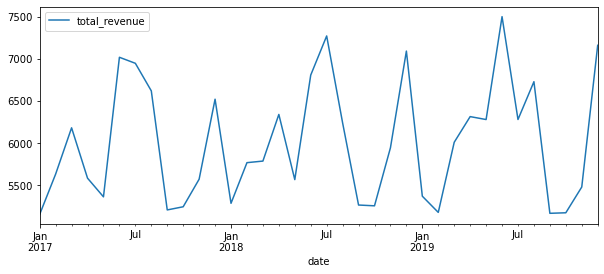

In [77]:
#Grab 3 years of data and plot graph
training = ts.loc[ts.date < '2020-01-01'].set_index('date')
training.plot(figsize=(10,4))

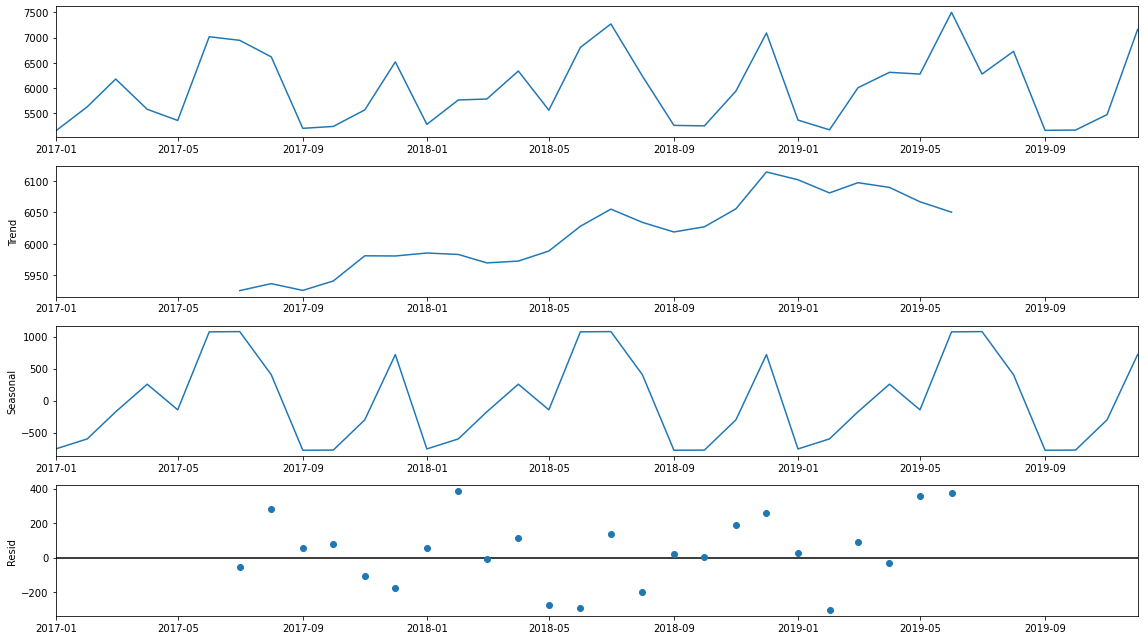

In [72]:
# See the components of a time series
# - Observed
# - Trend (direction)
# - Seasonal (repeated pattern)
# - Residual (noise)
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(training, model='additive')
plt.rcParams["figure.figsize"] = [16,9]
fig = decomposition.plot()

In [78]:
# Using mean and variance to check if time series is stationary
split = round(len(training) / 2)
x1 = training[0:split]
x2 = training[split:]
mean1= x1.mean()
mean2= x2.mean()
print("Mean 1 & 2= ", mean1[0], mean2[0])
var1=x1.var()
var2=x2.var()
print("Variance 1 & 2= ",var1[0], var2[0])

Mean 1 & 2=  5921.906111111044 6094.776111111042
Variance 1 & 2=  405401.40507220756 641895.7819780785


In [79]:
# Test to check that the time series is not defined by a trend, therefore it is a stationaty time series.
# We use the Augmented Dickey-Fuller test
test_adf = adfuller(training)
def adfuller_test(training):
    test_adf=adfuller(training)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(test_adf,labels):
        print(label+' : '+str(value) )

if test_adf[1] <= 0.05:
    print("There is strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("There is weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(training)

There is strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -3.8418010990621405
p-value : 0.0025074516997309285
#Lags Used : 9
Number of Observations : 26


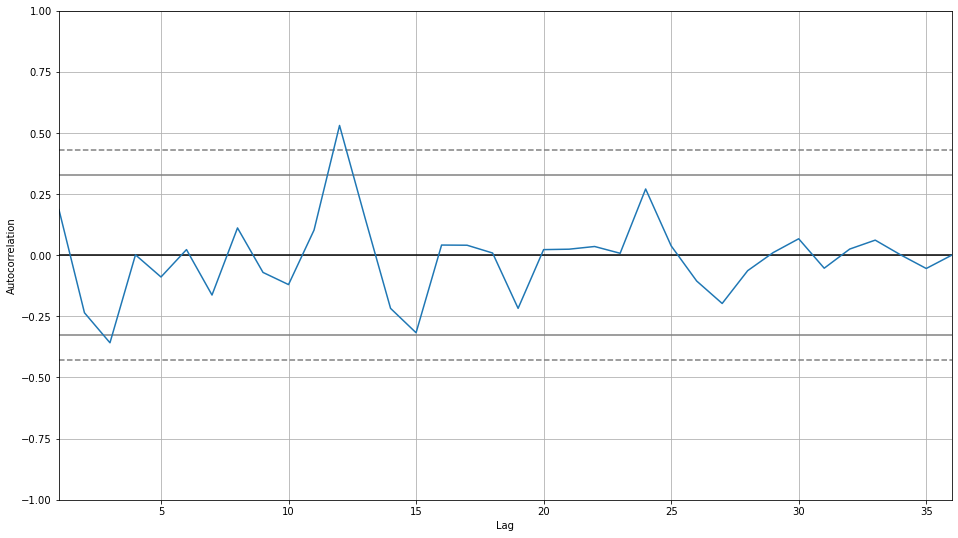

In [55]:
# The autocorrelation plot will help us to define one of the parameters of the ARIMA model (parameter p)
# An autocorrelation is the correlation of a signal with a delayed copy of itself.
# When a correlation value is closer to 0 it is telling us that there is randomness in our data; 
# a correlation of 1 (or -1) means we can use the delayed series to predict the current series entirely (which is ideal and uncommon). 
# We can see that around 3 months there is a negative correlation, ideally 12 months seem to have the highest correlation but after that the correlation is close to 0.
# Using p =3 for the arima model means that data from 3 months in the past can help predict the data now.
# A way we can test it is by implementing an AutoRegressive Integrated Moving Average model, or ARIMA.
autocorrelation_plot(training);

In [80]:
# Test dataset
test = ts.loc[ts.date >= '2020-01-01'].set_index('date').reset_index()
test.head(10)

,date,total_revenue
0,2020-01-01,5146.12
1,2020-02-01,6120.53
2,2020-03-01,5742.18
3,2020-04-01,6293.24
4,2020-05-01,6097.13


In [102]:
#forecasting values of the test set
whole = ts.set_index('date').squeeze().copy()
history = whole.take(range(36))
future = test.set_index('date').squeeze().copy()
for t in range(len(future)):
    model = ARIMA(history, order=(3,0,0), freq='MS')
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    obs = future[t]
    history = whole.take(range(36 + t+1))
    print('prediction', yhat, ', expected', obs, ', stderr', output[1], ', conf. int.', output[2])

prediction [6628.49496807] , expected 5146.11999999995 , stderr [627.24034675] , conf. int. [[5399.12647879 7857.86345735]]
prediction [5836.15651967] , expected 6120.529999999955 , stderr [660.57510584] , conf. int. [[4541.45310315 7130.85993619]]
prediction [5804.25731408] , expected 5742.179999999933 , stderr [653.07104761] , conf. int. [[4524.26158142 7084.25304675]]
prediction [6206.23350235] , expected 6293.239999999935 , stderr [644.64959873] , conf. int. [[4942.74350619 7469.7234985 ]]
prediction [6022.00135347] , expected 6097.12999999994 , stderr [636.60684515] , conf. int. [[4774.27486467 7269.72784227]]


In [109]:
#forecasting for the next 2 years
#we need running ARMA again so it captures the last observed value
model = ARIMA(history, order=(3,0,0), freq='MS')
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=24)
df_forecast = pd.DataFrame({'forecast':output[0]},index=pd.date_range(start='6/1/2020', periods=24, freq='MS'))

/Users/derricktan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [110]:
output[0]

array([6037.25145368, 5898.33398185, 5955.42042996, 5999.25192474,
       6035.31692909, 6014.2716982 , 5993.95836288, 5984.86614633,
       5993.59408154, 6001.74828394, 6003.74584872, 6000.03044249,
       5996.99659988, 5996.73975697, 5998.29969732, 5999.36692611,
       5999.28489812, 5998.64720086, 5998.29156964, 5998.38723697,
       5998.64025698, 5998.75132549, 5998.69217834, 5998.59479451])

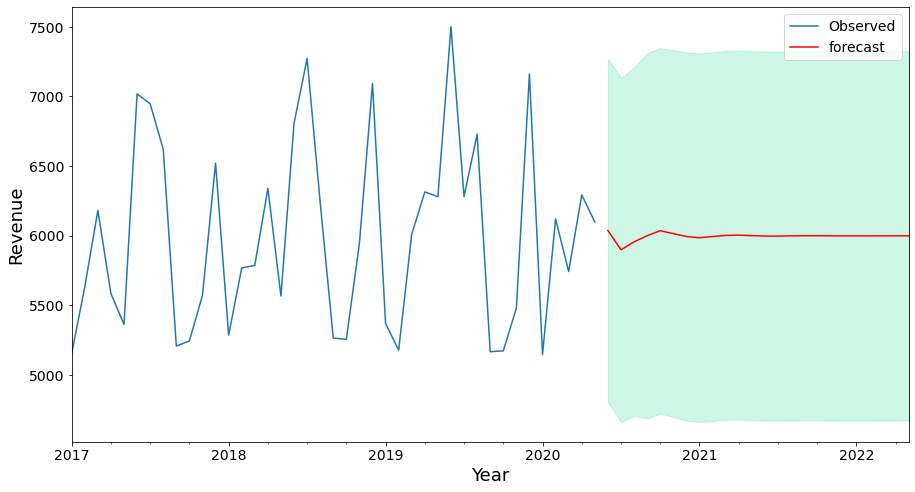

In [111]:
#Plotting the time series with forecast
ax = history.plot(label='Observed', figsize=(15, 8))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,0],
                ci[:,1], color='#3DDC97', alpha=.25)
ax.set_xlabel('Year',fontsize='18')
ax.set_ylabel('Revenue',fontsize='18')

plt.xticks(fontsize='14')
plt.yticks(fontsize='14')

plt.legend(fontsize=14)

plt.savefig("SFM Forecast.png")
plt.show()